# Make global data available as pandas data frame

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

In [1]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (8, 6)   # need bigger size otherwise xlabels are cut-off in svg files

In [2]:
import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')


def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#
def fetch_data(names = ['Confirmed', 'Deaths', 'Recovered']):
    """Return 4 data frames:
    [confirmed, deaths, recovered], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_19-covid-" + name + ".csv")
        df = pd.read_csv(url, index_col=1)

        location_info['Lat'] = df['Lat']
        location_info['Long'] = df['Long']
        location_info['Province/State'] = df['Province/State']
        location_info['location'] = df.index + "-" + df['Province/State']
        # df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs



In [3]:
# (confirmed, deaths, recovered), location_infos = fetch_data()
confirmed, deaths, recovered = fetch_data()

Confirmed : last data point from 2020-03-07 00:00:00
Deaths    : last data point from 2020-03-07 00:00:00
Recovered : last data point from 2020-03-07 00:00:00


In [4]:
deaths.head()

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,0,0,0,0,0,1,1,1,1,...,5,7,8,8,8,8,8,8,8,8
Mainland China,Chongqing,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
deaths.describe()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.075556,0.080000,0.115556,0.186667,0.248889,0.364444,0.582222,0.591111,0.760000,0.946667,...,12.506667,12.764444,13.071111,13.315556,13.711111,14.044444,14.462222,14.880000,15.377778,15.813333
std,1.133333,1.134995,1.602169,2.667730,3.468006,5.067454,8.333112,8.333555,10.799934,13.599396,...,176.039568,178.775629,181.782725,184.059901,186.885639,189.064232,191.538857,193.736978,195.882537,197.961037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,...,2641.000000,2682.000000,2727.000000,2761.000000,2803.000000,2835.000000,2871.000000,2902.000000,2931.000000,2959.000000


Available countries:

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
deaths

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,0,0,0,0,0,1,1,1,1,...,5,7,8,8,8,8,8,8,8,8
Mainland China,Chongqing,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Guangdong,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
Mainland China,Guangxi,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Guizhou,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Hainan,0,0,0,0,0,1,1,1,1,...,5,5,5,5,5,5,5,6,6,6


In [8]:
confirmed

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,1,9,15,39,60,70,106,152,200,...,989,990,990,990,990,990,990,990,990,990
Mainland China,Beijing,14,22,36,41,68,80,91,111,114,...,410,410,411,413,414,414,418,418,422,426
Mainland China,Chongqing,6,9,27,57,75,110,132,147,182,...,576,576,576,576,576,576,576,576,576,576
Mainland China,Fujian,1,5,10,18,35,59,80,84,101,...,296,296,296,296,296,296,296,296,296,296
Mainland China,Gansu,0,2,2,4,7,14,19,24,26,...,91,91,91,91,91,91,91,102,119,120
Mainland China,Guangdong,26,32,53,78,111,151,207,277,354,...,1347,1348,1349,1349,1350,1350,1350,1351,1352,1352
Mainland China,Guangxi,2,5,23,23,36,46,51,58,78,...,252,252,252,252,252,252,252,252,252,252
Mainland China,Guizhou,1,3,3,4,5,7,9,9,12,...,146,146,146,146,146,146,146,146,146,146
Mainland China,Hainan,4,5,8,19,22,33,40,43,46,...,168,168,168,168,168,168,168,168,168,168


In [9]:
recovered

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,2,2,...,792,821,868,873,917,936,956,970,979,979
Mainland China,Beijing,0,0,1,2,2,2,4,4,4,...,248,257,271,276,282,288,297,297,299,303
Mainland China,Chongqing,0,0,0,0,0,0,0,1,1,...,401,422,438,450,469,490,502,512,513,526
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,...,228,235,243,247,255,260,270,277,284,295
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,...,81,82,82,84,85,86,87,87,87,87
Mainland China,Guangdong,0,2,2,2,2,4,4,5,10,...,890,935,983,1016,1059,1101,1133,1181,1216,1237
Mainland China,Guangxi,0,0,0,0,0,0,2,2,2,...,161,168,176,181,192,202,210,214,217,218
Mainland China,Guizhou,0,0,0,0,0,0,0,1,1,...,112,112,112,112,114,114,114,114,114,115
Mainland China,Hainan,0,0,0,0,0,0,0,0,1,...,131,133,148,149,151,155,158,158,158,158


# Pick one country

In [10]:
country = "Germany"
# country = "San Marino"
# country = "UK"
# country = "Italy"

In [11]:
# create one DataFrame for country/region
c_df = pd.DataFrame()
c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
c_df['recovered'] = recovered.loc[country].drop('Province/State')
c_df['deaths'] = deaths.loc[country].drop('Province/State')
# Compute those who are infected and have not recovered or died yet and call them 'active'
c_df['active'] = c_df['confirmed'] - c_df['recovered'] - c_df['deaths']
c_df.index = string_to_date(c_df.index)

In [12]:
c_df.country = country  # remember which country we work on, just in case
c_df.tail()

,confirmed,recovered,deaths,active
2020-03-03,196,16,0,180
2020-03-04,262,16,0,246
2020-03-05,482,16,0,466
2020-03-06,670,17,0,653
2020-03-07,799,18,0,781


In [13]:
## Only cases since 25 Feb, set all values to zero for that day
c2_df = c_df['2020-02-25':] - c_df.loc['2020-02-25']
c2_df

,confirmed,recovered,deaths,active
2020-02-25,0,0,0,0
2020-02-26,10,1,0,9
2020-02-27,29,2,0,27
2020-02-28,31,2,0,29
2020-02-29,62,2,0,60
2020-03-01,113,2,0,111
2020-03-02,142,2,0,140
2020-03-03,179,2,0,177
2020-03-04,245,2,0,243
2020-03-05,465,2,0,463


/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


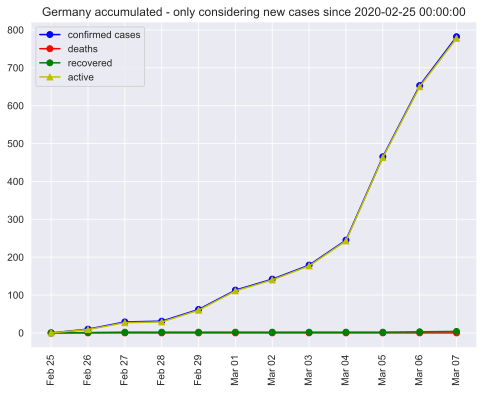

In [14]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c2_df.index, c2_df['confirmed'], 'o-b')
ax.plot(c2_df.index, c2_df['deaths'], 'o-r')
ax.plot(c2_df.index, c2_df['recovered'], 'o-g')
ax.plot(c2_df.index, c2_df['active'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title(country + " accumulated - only considering new cases since " + str(min(c2_df.index)));
fig.savefig("figures/germany-overview-25-feb.svg")

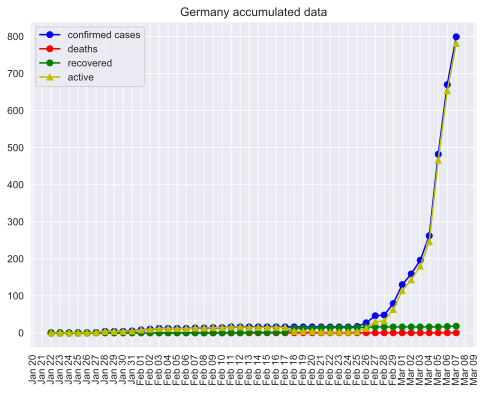

In [15]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c_df.index, c_df['confirmed'], 'o-b')
ax.plot(c_df.index, c_df['deaths'], 'o-r')
ax.plot(c_df.index, c_df['recovered'], 'o-g')
ax.plot(c_df.index, c_df['active'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title(country + " accumulated data")
fig.savefig("figures/germany-overview.svg")

# Compute some derived entities

In [16]:
# Compute day-to-day increases
c_df['new_confirmed'] = c_df['confirmed'].diff()
c_df['new_recovered'] = c_df['recovered'].diff()
c_df['new_deaths'] = c_df['deaths'].diff()
c_df['new_active'] = c_df['active'].diff()
c_df.tail()

,confirmed,recovered,deaths,active,new_confirmed,new_recovered,new_deaths,new_active
2020-03-03,196,16,0,180,37,0,0,37
2020-03-04,262,16,0,246,66,0,0,66
2020-03-05,482,16,0,466,220,0,0,220
2020-03-06,670,17,0,653,188,1,0,187
2020-03-07,799,18,0,781,129,1,0,128


In [17]:
c2_df['days-td'] = c2_df.index - c2_df.index.min()  # days as TimeDelta type
c2_df['days'] = c2_df['days-td'].astype("timedelta64[D]").astype(float)

In [18]:
c2_df

,confirmed,recovered,deaths,active,days-td,days
2020-02-25,0,0,0,0,0 days,0.0
2020-02-26,10,1,0,9,1 days,1.0
2020-02-27,29,2,0,27,2 days,2.0
2020-02-28,31,2,0,29,3 days,3.0
2020-02-29,62,2,0,60,4 days,4.0
2020-03-01,113,2,0,111,5 days,5.0
2020-03-02,142,2,0,140,6 days,6.0
2020-03-03,179,2,0,177,7 days,7.0
2020-03-04,245,2,0,243,8 days,8.0
2020-03-05,465,2,0,463,9 days,9.0


In [19]:
def model_par(t0=None, p=None, c=None, a0=None):
    """Just to order parameters into tuple for curve_fit call"""
    return t0, p, c, a0

def model(t, t0, p, c, a0):
    """Simple model"""
    
    return c*(t-t0)**p + a0 

def pretty_params(param, end="\n"):
    t0, p, c, a0 = param
    s = "p = {:.3f}".format(p) + end
    s += "c = {:.3g}".format(c) + end
    s += "t0= {:.3f}".format(t0) + end
    s += "a0= {:.3f}".format(a0)
    return s

In [20]:
p0 = model_par(t0=0, p=2, c=5, a0=0)   # guess initial values for fit parameters
days = c2_df['days']
infections = c2_df['confirmed']
param_infections, cov_infections = \
    scipy.optimize.curve_fit(model, days, 
                             infections, 
                             p0=p0)  

In [21]:
t0, p, c, a0 = param_infections
fitted_infections = model(days, t0, p, c, a0)
print(pretty_params(param_infections))

p = 2.044
c = 5.36
t0= -0.000
a0= -15.660


In [22]:
# Estimated standard deviation of parameters
with np.printoptions(precision=2, suppress=True):
    print(np.sqrt(cov_infections.diagonal()))

[ 2.62  0.83 12.64 43.83]


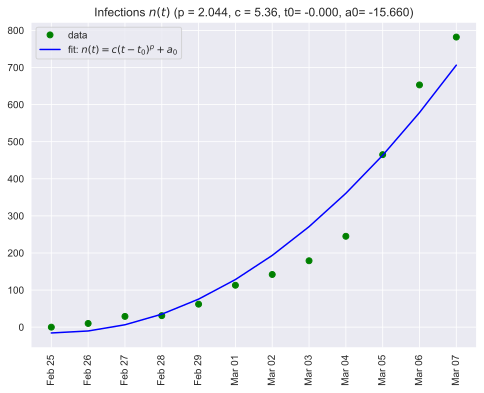

In [23]:
c2_df['date'] = c2_df.index
fig, ax = plt.subplots(figsize=figsize)
ax.plot(c2_df['date'], c2_df['confirmed'], 'og')
ax.plot(c2_df['date'], fitted_infections, '-b')
ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
fig.savefig('figures/infections-with-model-fit.svg')

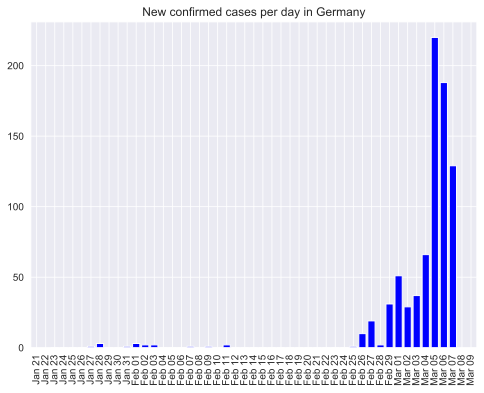

In [24]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_confirmed'], color='b')
set_date_formatting(ax)
ax.set_title(f"New confirmed cases per day in {c_df.country}")
fig.savefig(f'figures/new-cases-{c_df.country}.svg')

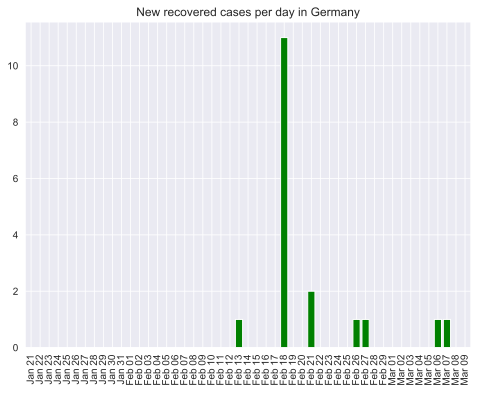

In [25]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_recovered'], color='g')
set_date_formatting(ax)
ax.set_title(f"New recovered cases per day in {c_df.country}")
fig.savefig(f'figures/new-recovered-{c_df.country}.svg')

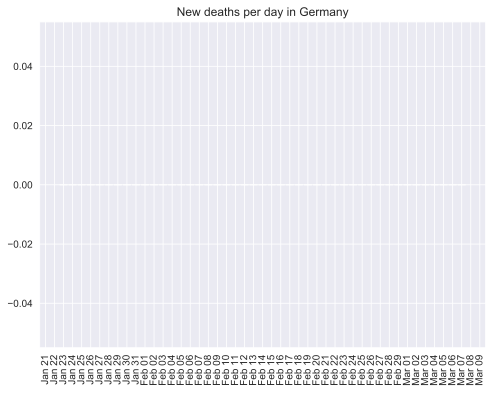

In [26]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_deaths'], color='r')
set_date_formatting(ax)
ax.set_title(f"New deaths per day in {c_df.country}")
fig.savefig(f'figures/new-deaths-{c_df.country}.svg')

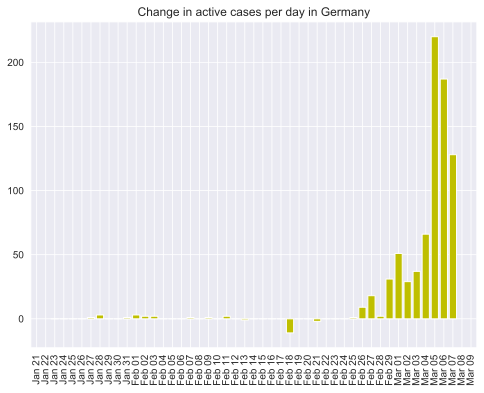

In [27]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_active'], color='y')
set_date_formatting(ax)
ax.set_title(f"Change in active cases per day in {c_df.country}")
fig.savefig(f'figures/new-active-{c_df.country}.svg')

# Look at some world wide data

In [28]:
# global data
glob = pd.DataFrame()
glob['deaths'] = deaths.sum(axis=0)
glob['confirmed'] = confirmed.sum(axis=0)
glob['recovered'] = recovered.sum(axis=0)
glob['active'] = glob['confirmed'] - glob['deaths'] - glob['recovered']
glob.index = string_to_date(glob.index)

In [29]:
pd.set_option('display.max_columns', 200)
glob

,deaths,confirmed,recovered,active
2020-01-22,17,555,28,510
2020-01-23,18,653,30,605
2020-01-24,26,941,36,879
2020-01-25,42,1434,39,1353
2020-01-26,56,2118,52,2010
2020-01-27,82,2927,61,2784
2020-01-28,131,5578,107,5340
2020-01-29,133,6166,126,5907
2020-01-30,171,8234,143,7920
2020-01-31,213,9927,222,9492


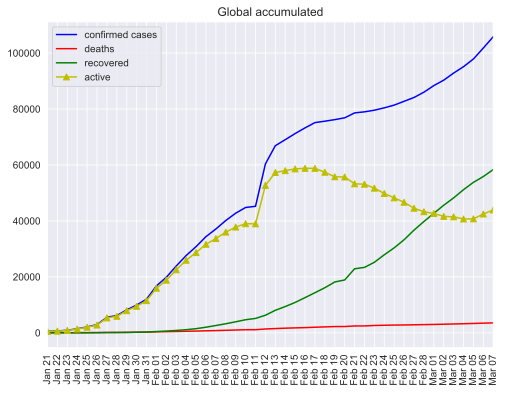

In [30]:
fig, ax = plt.subplots(figsize=figsize)
glob['confirmed'].plot(kind='line', style='-b', ax=ax)
glob['deaths'].plot(kind='line', style='-r', ax=ax)
glob['recovered'].plot(kind='line', style='-g', ax=ax)
glob['active'].plot(kind='line', style='^-y', ax=ax)
set_date_formatting(ax)
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title("Global accumulated");
fig.savefig('figures/global-overview.svg')

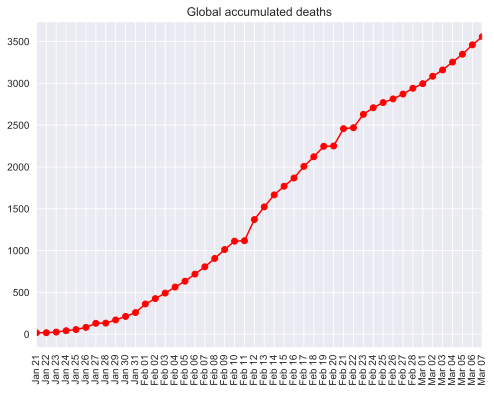

In [31]:
fig, ax = plt.subplots(figsize=figsize)
glob['deaths'].plot(kind='line', style='o-r', ax=ax)
set_date_formatting(ax)
ax.set_title("Global accumulated deaths");
fig.savefig("figures/global-deaths.svg")

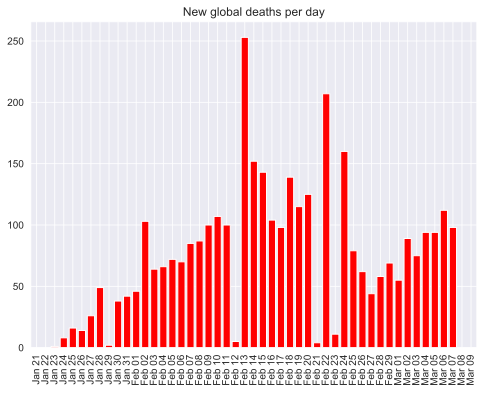

In [32]:
glob['new-deaths'] = glob['deaths'].diff()
glob['new-confirmed'] = glob['confirmed'].diff()

fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-deaths'], color='r' )
set_date_formatting(ax)
ax.set_title("New global deaths per day")
fig.savefig('figures/global-new-deaths.svg');

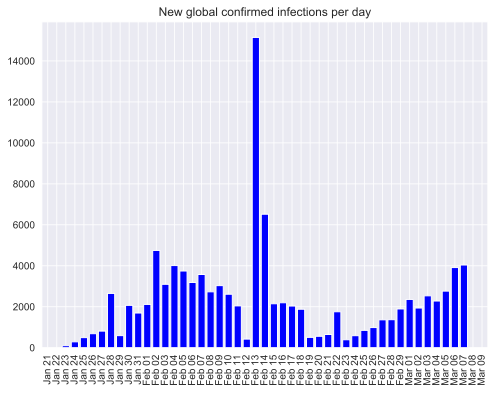

In [33]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-confirmed'], color='b')
set_date_formatting(ax)
ax.set_title("New global confirmed infections per day");
fig.savefig('figures/global-new-infections.svg');

# Any common behaviour in growth of infections?

In [34]:
# reduce to only countries with more than ncase cases
ncase = 1000
c3 = confirmed[confirmed.sum(axis=1) > ncase]
c3 = c3.drop('Province/State', axis=1)
print(f"Found {len(c3)} data sets with more than {ncase} infections")

Found 40 data sets with more than 1000 infections


In [35]:

norm = c3.sum(axis=1)

In [36]:
c4 = c3.div(norm, axis='index')
c4 = c3

In [37]:
c4.sum(axis=1)
mainland_china = c4.loc['Mainland China'].sum()
c5 = c4.drop('Mainland China')  # remove the long list of regions in China
# but add summary for China (sum over all regions, then normalised)
c5.loc['Mainland China (sum)'] = mainland_china/mainland_china.sum()
print(f"{len(c5)} data sets remaining after removing regions in China")

12 data sets remaining after removing regions in China


/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
c5

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Thailand,2.000000,3.000000,5.000000,7.000000,8.000000,8.000000,14.00000,14.000000,14.000000,19.000000,19.000000,19.00000,19.000000,25.000000,25.000000,25.000000,25.000000,32.000000,32.000000,32.000000,33.000000,33.00000,33.000000,33.00000,33.000000,34.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,37.000000,40.000000,40.000000,41.000000,42.00000,42.000000,43.000000,43.000000,43.000000,47.000000,48.000000,50.000000
Japan,2.000000,1.000000,2.000000,2.000000,4.000000,4.000000,7.00000,7.000000,11.000000,15.000000,20.000000,20.00000,20.000000,22.000000,22.000000,45.000000,25.000000,25.000000,26.000000,26.000000,26.000000,28.00000,28.000000,29.00000,43.000000,59.000000,66.000000,74.000000,84.00000,94.000000,105.000000,122.000000,147.000000,159.000000,170.000000,189.000000,214.000000,228.000000,241.00000,256.000000,274.000000,293.000000,331.000000,360.000000,420.000000,461.000000
South Korea,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,4.00000,4.000000,4.000000,11.000000,12.000000,15.00000,15.000000,16.000000,19.000000,23.000000,24.000000,24.000000,25.000000,27.000000,28.000000,28.00000,28.000000,28.00000,28.000000,29.000000,30.000000,31.000000,31.00000,104.000000,204.000000,433.000000,602.000000,833.000000,977.000000,1261.000000,1766.000000,2337.000000,3150.00000,3736.000000,4335.000000,5186.000000,5621.000000,6088.000000,6593.000000,7041.000000
Hong Kong,0.000000,2.000000,2.000000,5.000000,8.000000,8.000000,8.00000,10.000000,10.000000,12.000000,13.000000,15.00000,15.000000,17.000000,21.000000,24.000000,25.000000,26.000000,29.000000,38.000000,49.000000,50.00000,53.000000,56.00000,56.000000,57.000000,60.000000,62.000000,63.00000,68.000000,68.000000,69.000000,74.000000,79.000000,84.000000,91.000000,92.000000,94.000000,95.00000,96.000000,100.000000,100.000000,105.000000,105.000000,107.000000,108.000000
Singapore,0.000000,1.000000,3.000000,3.000000,4.000000,5.000000,7.00000,7.000000,10.000000,13.000000,16.000000,18.00000,18.000000,24.000000,28.000000,28.000000,30.000000,33.000000,40.000000,45.000000,47.000000,50.00000,58.000000,67.00000,72.000000,75.000000,77.000000,81.000000,84.00000,84.000000,85.000000,85.000000,89.000000,89.000000,91.000000,93.000000,93.000000,93.000000,102.00000,106.000000,108.000000,110.000000,110.000000,117.000000,130.000000,138.000000
France,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,4.00000,5.000000,5.000000,5.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.00000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,14.000000,18.000000,38.000000,57.000000,100.00000,130.000000,191.000000,204.000000,285.000000,377.000000,653.000000,949.000000
Germany,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000,4.000000,4.000000,5.000000,8.000000,10.00000,12.000000,12.000000,12.000000,12.000000,13.000000,13.000000,14.000000,14.000000,16.000000,16.00000,16.000000,16.00

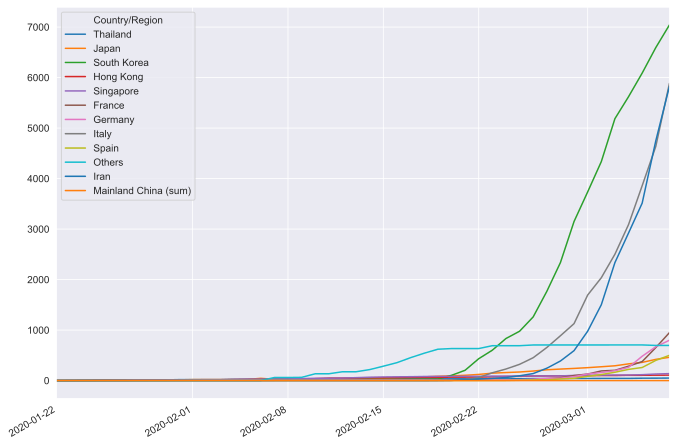

In [39]:
fig, ax = plt.subplots(figsize=(11,8))
c5.T.plot(ax=ax)

Hm, not very conclusive.

# Some countries in Europe


In [40]:
countries = ['Italy', 'France', 'Spain', 'Germany', 'Finland', 'UK', 'Sweden', 'Belgium', 'Croatia', 'Norway', 'Netherlands', 'Iceland']
styles = ['-og', '+-r', 'v-.', '-ok', '-g', 'b-^', ':y', '-y', '-r+', 'g-', '-bo', '^-']
eu_deaths = deaths.loc[countries].T
eu_deaths.drop('Province/State', inplace=True)
eu_cases = confirmed.loc[countries].T
eu_cases.drop('Province/State', inplace=True)

In [41]:
eu_deaths.tail()

Country/Region,Italy,France,Spain,Germany,Finland,UK,Sweden,Belgium,Croatia,Norway,Netherlands,Iceland
2020-03-03 00:00:00,79,4,1,0,0,0,0,0,0,0,0,0
2020-03-04 00:00:00,107,4,2,0,0,0,0,0,0,0,0,0
2020-03-05 00:00:00,148,6,3,0,0,1,0,0,0,0,0,0
2020-03-06 00:00:00,197,9,5,0,0,2,0,0,0,0,1,0
2020-03-07 00:00:00,233,11,10,0,0,2,0,0,0,0,1,0


Text(0.5, 1.0, 'Deaths in some European countries (log scale)')

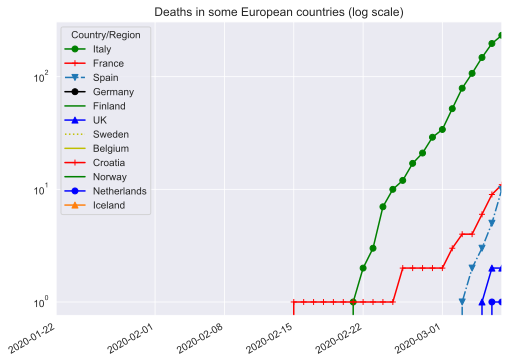

In [42]:
fig, ax = plt.subplots(figsize=figsize)
eu_deaths.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Deaths in some European countries (log scale)")

In [43]:
eu_cases.tail()

Country/Region,Italy,France,Spain,Germany,Finland,UK,Sweden,Belgium,Croatia,Norway,Netherlands,Iceland
2020-03-03 00:00:00,2502,204,165,196,6,51,21,13,9,32,24,11
2020-03-04 00:00:00,3089,285,222,262,6,85,35,23,10,56,38,26
2020-03-05 00:00:00,3858,377,259,482,12,115,94,50,10,87,82,34
2020-03-06 00:00:00,4636,653,400,670,15,163,101,109,11,108,128,43
2020-03-07 00:00:00,5883,949,500,799,15,206,161,169,12,147,188,50


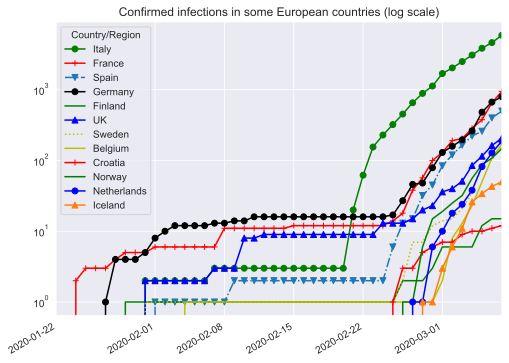

In [44]:
fig, ax = plt.subplots(figsize=figsize)

eu_cases.plot(kind='line', ax=ax, style=styles)
ax.set_yscale('log')
ax.set_title("Confirmed infections in some European countries (log scale)");

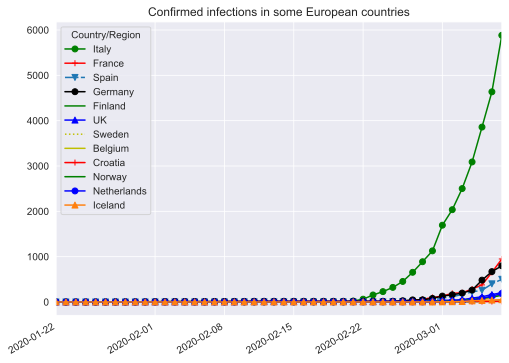

In [45]:
fig, ax = plt.subplots(figsize=figsize)
eu_cases.plot(kind='line', ax=ax, style=styles)
ax.set_title("Confirmed infections in some European countries");